Is the %accuracy of EX30 significantly different to LD30, when requested expansion > 2.0 mm?

---13-23.cc---
EX30: mean=81.69028958498194	std=16.986925080920965	n=17
LD30: mean=84.0955515546046	std=9.750861345509202	n=21
p=0.587157787286

---14-24.cc---
EX30: mean=76.82387608013687	std=22.907037066653157	n=23
LD30: mean=86.08373427613502	std=12.477336386084032	n=35
p=0.0515377029859

---15-25.cc---
EX30: mean=71.24144594242112	std=21.680812459615094	n=21
LD30: mean=83.6468701552727	std=16.331908031557376	n=31
*p=0.0226121478146

---16-26.cc---
EX30: mean=50.14894887966532	std=22.37343344414332	n=11
LD30: mean=82.15342040426209	std=29.940948111123173	n=22
*p=0.00383424782616

---33-43.cc---
EX30: mean=85.56778685550694	std=17.036260756349204	n=16
LD30: mean=90.99970092387278	std=15.95563470448671	n=27
p=0.298761857387

---34-44.cc---
EX30: mean=84.29513522918604	std=33.632751295133815	n=21
LD30: mean=90.14128410518862	std=25.667500608097154	n=31
p=0.480736522499

---35-45.cc---
EX30: me

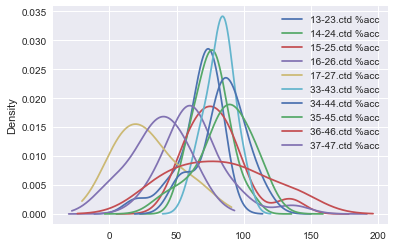

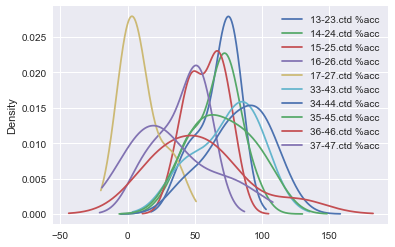

In [1]:
%run data-analysis.ipynb

In [2]:
def compare_ex30_vs_ld30(measure_type, threshold):
    '''Prints statistical analysis comparing %acc of EX30 vs LD30 for a
    given measure_type and minimum expansion threshold'''
    
    if threshold:
        print("Is the %%accuracy of EX30 significantly different to LD30, when requested expansion > %s mm?\n" % threshold)
    else:
        print("Is the %accuracy of EX30 significantly different to LD30, for any level of requested expansion?")

    all_ex30 = pd.Series([])
    all_ld30 = pd.Series([])
    
    for i, j in zip([1, 3], [2, 4]):
        for toothNum in range(3, 8):
            if measure_type == '.cc' and toothNum == 7:
                continue

            antimere = '%s%s-%s%s' % (i, toothNum, j, toothNum)
            full_antimere = '%s%s-%s%s%s' % (i, toothNum, j, toothNum, measure_type)

            col1 = getColumn(df, '%s %%acc' % full_antimere, antimere, threshold, measure_type, 'EX30')            
            col2 = getColumn(df, '%s %%acc' % full_antimere, antimere, threshold, measure_type, 'LD30')
            stat, p = stats.ttest_ind(col1, col2, nan_policy='omit')

            print('---%s---' % full_antimere)
            print('EX30: mean=%s\tstd=%s\tn=%s' % (col1.mean(), col1.std(), col1.count()))
            print('LD30: mean=%s\tstd=%s\tn=%s' % (col2.mean(), col2.std(), col2.count()))
            s = 'p=%s' % p
            if p < 0.05:
                s = '*' + s
            print('%s\n' % s)
            
            all_ex30 = all_ex30.append(col1)
            all_ld30 = all_ld30.append(col2)
    
    stat, p = stats.ttest_ind(all_ex30, all_ld30, nan_policy='omit')
    print('ALL EX30%s: mean=%s\tstd=%s\tn=%s' % (measure_type, all_ex30.mean(), all_ex30.std(), all_ex30.count()))
    print('ALL LD30%s: mean=%s\tstd=%s\tn=%s' % (measure_type, all_ld30.mean(), all_ld30.std(), all_ld30.count()))
    
    s = 'p=%s' % p
    if p < 0.05:
        s = '*' + s
    print('%s\n\n\n' % s)
    
    return

In [3]:
def compare_predicted_vs_achieved(material, measure_type, threshold):
    '''Prints statistical analysis comparing %acc of  vs LD30 for a
    given measure_type and minimum expansion threshold'''
    
    assert(material in ['LD30', 'EX30'])
    
    if threshold:
        print("Is the actual expansion of %s significantly different to its predicted expansion, for cases where predicted expansion >%s mm?\n"\
          % (material, threshold))
    else:
        print("Is the actual expansion of %s significantly different to its predicted expansion, for any level of predicted expansion?\n"\
          % (material))
    
    for i, j in zip([1, 3], [2, 4]):
        for toothNum in range(3, 8):
            if measure_type == '.cc' and toothNum == 7:
                continue

            antimere = '%s%s-%s%s' % (i, toothNum, j, toothNum)
            full_antimere = '%s%s-%s%s%s' % (i, toothNum, j, toothNum, measure_type)

            col1 = getColumn(df, '%sf%s' % (antimere, measure_type), antimere, threshold, measure_type, material)
            col2 = getColumn(df, '%sp%s' % (antimere, measure_type), antimere, threshold, measure_type, material)
            stat, p = stats.ttest_rel(col1, col2, nan_policy='omit')

            print('---%s---' % full_antimere)
            s = 'p=%s' % p
            if p < 0.05:
                s = '*' + s
            print('%s\tn=%s\n' % (s, col1.count()))
    return

In [6]:
for measure_type in MEASURE_TYPES:
    compare_ex30_vs_ld30(measure_type, HISTOGRAM_THRESHOLD)
    compare_ex30_vs_ld30(measure_type, False)

Is the %accuracy of EX30 significantly different to LD30, when requested expansion > 2.0 mm?

---13-23.cc---
EX30: mean=81.69028958498194	std=16.986925080920965	n=17
LD30: mean=84.0955515546046	std=9.750861345509202	n=21
p=0.587157787286

---14-24.cc---
EX30: mean=76.82387608013687	std=22.907037066653157	n=23
LD30: mean=86.08373427613502	std=12.477336386084032	n=35
p=0.0515377029859

---15-25.cc---
EX30: mean=71.24144594242112	std=21.680812459615094	n=21
LD30: mean=83.6468701552727	std=16.331908031557376	n=31
*p=0.0226121478146

---16-26.cc---
EX30: mean=50.14894887966532	std=22.37343344414332	n=11
LD30: mean=82.15342040426209	std=29.940948111123173	n=22
*p=0.00383424782616

---33-43.cc---
EX30: mean=85.56778685550694	std=17.036260756349204	n=16
LD30: mean=90.99970092387278	std=15.95563470448671	n=27
p=0.298761857387

---34-44.cc---
EX30: mean=84.29513522918604	std=33.632751295133815	n=21
LD30: mean=90.14128410518862	std=25.667500608097154	n=31
p=0.480736522499

---35-45.cc---
EX30: me

In [7]:
for measure_type in MEASURE_TYPES:
    compare_predicted_vs_achieved('LD30', measure_type, False)

Is the actual expansion of LD30 significantly different to its predicted expansion, for any level of predicted expansion?

---13-23.cc---
*p=0.00597607487109	n=36

---14-24.cc---
*p=5.75073337538e-07	n=36

---15-25.cc---
*p=3.20637143392e-06	n=36

---16-26.cc---
*p=0.00775608135966	n=36

---33-43.cc---
*p=0.0200875313639	n=36

---34-44.cc---
p=0.0773204265074	n=36

---35-45.cc---
*p=0.00218411391909	n=34

---36-46.cc---
p=0.416287802408	n=36

Is the actual expansion of LD30 significantly different to its predicted expansion, for any level of predicted expansion?

---13-23.ctd---
*p=1.77658880144e-09	n=36

---14-24.ctd---
*p=1.88928091287e-08	n=36

---15-25.ctd---
*p=4.53621240251e-06	n=36

---16-26.ctd---
*p=0.000517704553711	n=36

---17-27.ctd---
p=0.561418533703	n=36

---33-43.ctd---
*p=1.13184211543e-05	n=36

---34-44.ctd---
*p=0.000443317118496	n=36

---35-45.ctd---
*p=0.00636076098326	n=36

---36-46.ctd---
p=0.159427800052	n=36

---37-47.ctd---
p=0.195842190185	n=36

Is the actual